### Airline Passengers Prediction - The Time Series Prediciton with LSTM 

#### LSTM for international airline passengers problem with regression framing

In [1]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.config.list_physical_devices('GPU')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# fix random seed for reproducibility
np.random.seed(7)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# loading the dataset

dataset_path = 'C:/DevelopmentPlayground/Datasets/international-airline-passengers.csv'

dataframe = pd.read_csv(dataset_path, engine='python', skipfooter=3)

In [3]:
dataframe.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataframe.tail()

,Month,Passengers
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
# Reshaping the data either using array.reshape(-1, 1) if the data has a single feature
# or  array.reshape(1, -1) if it contains a single sample
dataset = dataframe["Passengers"]

dataset = np.array(dataset).reshape(-1, 1)

dataset[:5] # selecting ist 5 rows

array([[112],
       [118],
       [132],
       [129],
       [121]], dtype=int64)

In [6]:
# converting int to float

dataset = dataset.astype('float32')

dataset[:5] # selecting ist 5 rows

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.]], dtype=float32)

In [7]:
# normalize the dataset - in ranage of (0, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# Splitting the dataset ito train and test set

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size, :], dataset[train_size: len(dataset), :]

In [9]:
print('train :', len(train))
print('test :', len(test))

train : 95
test : 48


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i: (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t and y= t+1

look_back = 3

train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

In [12]:
print('train_X :', train_X)

train_X : [[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]
 [0.04826255 0.03281853 0.05984557]
 [0.03281853 0.05984557 0.08494207]
 [0.05984557 0.08494207 0.08494207]
 [0.08494207 0.08494207 0.06177607]
 [0.08494207 0.06177607 0.02895753]
 [0.06177607 0.02895753 0.        ]
 [0.02895753 0.         0.02702703]
 [0.         0.02702703 0.02123553]
 [0.02702703 0.02123553 0.04247104]
 [0.02123553 0.04247104 0.07142857]
 [0.04247104 0.07142857 0.05984557]
 [0.07142857 0.05984557 0.04054055]
 [0.05984557 0.04054055 0.08687258]
 [0.04054055 0.08687258 0.12741312]
 [0.08687258 0.12741312 0.12741312]
 [0.12741312 0.12741312 0.10424709]
 [0.12741312 0.10424709 0.05598456]
 [0.10424709 0.05598456 0.01930502]
 [0.05598456 0.01930502 0.06949806]
 [0.01930502 0.06949806 0.07915059]
 [0.06949806 0.07915059 0.08880308]
 [0.07915059 0.08880308 0.14285713]
 [0.08880308 0.14285713 0.11389962]
 [0.14285713 0.11389962 0.13127413]
 [0.11389962 0.131

In [13]:
print('train_Y :', train_Y)

train_Y : [0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
 0.02895753 0.         0.02702703 0.02123553 0.04247104 0.07142857
 0.05984557 0.04054055 0.08687258 0.12741312 0.12741312 0.10424709
 0.05598456 0.01930502 0.06949806 0.07915059 0.08880308 0.14285713
 0.11389962 0.13127413 0.14285713 0.18339768 0.18339768 0.15444016
 0.11196911 0.08108109 0.1196911  0.12934363 0.14671814 0.17181468
 0.14864865 0.15250966 0.22007722 0.24324325 0.26640925 0.2027027
 0.16795367 0.13127413 0.17374519 0.17760617 0.17760617 0.25482625
 0.25289574 0.24131274 0.26833975 0.3088803  0.32432434 0.25675675
 0.20656371 0.14671814 0.18725869 0.19305018 0.16216215 0.25289574
 0.23745173 0.25096524 0.3088803  0.38223937 0.36486486 0.2992278
 0.24131274 0.1911197  0.24131274 0.26640925 0.24903473 0.31467178
 0.3185328  0.32046333 0.4073359  0.5019305  0.46911195 0.40154442
 0.32818535 0.25675675 0.3359073  0.34749034 0.33397684 0.41119692
 0.4034749  0.4131274  0.52123547 0.5965251  0.5810810

In [14]:
print('test_X :', test_X)

test_X : [[0.3899614  0.4073359  0.3803089 ]
 [0.4073359  0.3803089  0.48648646]
 [0.3803089  0.48648646 0.47104248]
 [0.48648646 0.47104248 0.484556  ]
 [0.47104248 0.484556   0.6138996 ]
 [0.484556   0.6138996  0.6969112 ]
 [0.6138996  0.6969112  0.70077217]
 [0.6969112  0.70077217 0.57915056]
 [0.70077217 0.57915056 0.46911195]
 [0.57915056 0.46911195 0.38803086]
 [0.46911195 0.38803086 0.44787642]
 [0.38803086 0.44787642 0.45559844]
 [0.44787642 0.45559844 0.4131274 ]
 [0.45559844 0.4131274  0.4980695 ]
 [0.4131274  0.4980695  0.47104248]
 [0.4980695  0.47104248 0.49999997]
 [0.47104248 0.49999997 0.6389961 ]
 [0.49999997 0.6389961  0.7471043 ]
 [0.6389961  0.7471043  0.7741313 ]
 [0.7471043  0.7741313  0.57915056]
 [0.7741313  0.57915056 0.492278  ]
 [0.57915056 0.492278   0.3976834 ]
 [0.492278   0.3976834  0.44980696]
 [0.3976834  0.44980696 0.49420848]
 [0.44980696 0.49420848 0.45945945]
 [0.49420848 0.45945945 0.5830116 ]
 [0.45945945 0.5830116  0.5637065 ]
 [0.5830116  0.5637

In [15]:
print('test_Y :', test_Y)

test_Y : [0.48648646 0.47104248 0.484556   0.6138996  0.6969112  0.70077217
 0.57915056 0.46911195 0.38803086 0.44787642 0.45559844 0.4131274
 0.4980695  0.47104248 0.49999997 0.6389961  0.7471043  0.7741313
 0.57915056 0.492278   0.3976834  0.44980696 0.49420848 0.45945945
 0.5830116  0.5637065  0.61003864 0.71042466 0.8571429  0.8783784
 0.69305015 0.5849421  0.4980695  0.58108103 0.6042471  0.554054
 0.60810804 0.6891892  0.71042466 0.8320464  1.         0.96911204
 0.7799227  0.6891892 ]


In [16]:
# The LSTM network expects the input data (X) to be provided with a specific array structure in
# the form of: [samples, time steps, features].

# reshape input to be [samples, time steps, features]

train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


In [17]:
print('train_X :', train_X[0:5]) # checking Ist 5 rows
print('test_X :', test_X[0:5]) # checking Ist 5 rows

train_X : [[[0.01544401 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]

 [[0.05405405 0.04826255 0.03281853]]

 [[0.04826255 0.03281853 0.05984557]]

 [[0.03281853 0.05984557 0.08494207]]]
test_X : [[[0.3899614  0.4073359  0.3803089 ]]

 [[0.4073359  0.3803089  0.48648646]]

 [[0.3803089  0.48648646 0.47104248]]

 [[0.48648646 0.47104248 0.484556  ]]

 [[0.47104248 0.484556   0.6138996 ]]]


In [18]:
# create and fit the one to one LSTM network

# LSTM network has a visible layer with 1 input i.e. input_dim=look_back, 
# a hidden layer with 4 LSTM blocks or Neurons 
# with default 'tanh' activation and 'sigmoid' being default recurrent_activation
# a fully connected layer (Dense) with single neuron.

model = Sequential()
model.add(LSTM(units=4, input_dim= look_back, activation='tanh', recurrent_activation='sigmoid')) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [19]:
# fit the model
import datetime
start = datetime.datetime.now()

model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=1)

stop = datetime.datetime.now()
print("Total time taken : ", str(stop - start))

Epoch 1/100
91/91 [==============================] - 5s 7ms/step - loss: 0.0508
Epoch 2/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0241
Epoch 3/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0168
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0141
Epoch 5/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0125
Epoch 6/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0110
Epoch 7/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0097
Epoch 8/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0084
Epoch 9/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0074
Epoch 10/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0065
Epoch 11/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 12/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0051
Epoch 13/100
91/91 [=================

In [20]:
# make predictions

train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

In [21]:
# invert the prediction, because we have scaled the data using MinMaxScaler

train_predict = scaler.inverse_transform(train_predict)

train_Y = scaler.inverse_transform([train_Y])

test_predict = scaler.inverse_transform(test_predict)

test_Y = scaler.inverse_transform([test_Y])


In [22]:
# calculate the root mean squared error

train_score = math.sqrt(mean_squared_error(train_Y[0], train_predict[:, 0]))

print('Train Score : %.2f RMSE' %(train_score))

Train Score : 25.87 RMSE


In [23]:
test_score = math.sqrt(mean_squared_error(test_Y[0], test_predict[:, 0]))

print('Test Score : %.2f RMSE' %(test_score))

Test Score : 61.72 RMSE


In [24]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [25]:
# shift test predictions for plotting

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(dataset) - 1, :] = test_predict

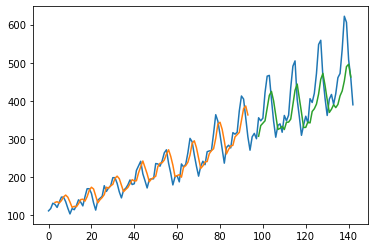

In [26]:
# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<span> The model has an average error of 22.88 i.e., 23 passenges (in thousands) on training dataset </span>

<span> The model has an average error of 49.62 i.e., 50 passenges (in thousands) on test dataset </span>